# Temporal Patterns in Oil Prices - Monthly, Weekly, Daily Analysis

### Baris Sanli barissanli2@gmail.com
www.barissanli.com/python

Can we have a generic oil price pattern for the whole year? Are there any hidden data patterns in oil price movements that still needs to be investigated? Is the Chinese new year more important than US driving season or Hajj period in Saudi Arabia?
Questions in oil prices never cease. That is an attractive property of oil price discussions, the zenith of such discussions is oil price forecasts. Experts refrain, ignorants try their chances with a gamblers enthusiasm.
In this article, a Python based oil price behaviour will be discussed. The code and the relevant parts are available on my web page



## Data

Data is downloaded from EIA website from https://www.eia.gov/dnav/pet/hist_xls/RBRTEd.xls . It includes daily Brent prices from 1987 and provides a good source for analysis

## Libraries

I do not enjoy Python's red alert warnings. They are important, do doubts. In my first run I let them scream. But for the notebook purposes I choose to supress them

In [85]:
# Supress warnings
import warnings
warnings.filterwarnings('ignore')

Then comes the necessary libraries for analysis. I use inline to include matplotlib(plotting library), numpy(for numerical analysis) and pandas 

In [86]:
# use pylab inline to numpy, matplotlib
%pylab inline

# now include Pandas library for data analysis
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


## A first look at data

For the rest of the exercise, I will use one data source. It is an Excel file. If it fails to load, check internet connection and then make sure that you installed **_xlrd_** library from terminal.
For xlrd use command "**pip install xlrd**"
My data source is named **Brent_data**

In [87]:
Brent_data="https://www.eia.gov/dnav/pet/hist_xls/RBRTEd.xls"

**read_excel** command from Pandas library can directly download and convert the date into data frames. Excel file may have extra rows or columns before data, so we have to tell how many rows should we skip before reaching the data 

In [88]:
prices=pd.read_excel("https://www.eia.gov/dnav/pet/hist_xls/RBRTEd.xls",sheet_name="Data 1", skiprows=2)

Let's see the shape of data with shape attribute

In [89]:
prices.shape

(8048, 2)

Our data has 2 columns and 8043 rows. Now let's check the beginning and end of our data set. 
We have to call **head** and **tail** commands for start and end of data. It is also possible to set the number of data you want to see.

In [90]:
#first 4 data points
prices.head(4)

,Date,Europe Brent Spot Price FOB (Dollars per Barrel)
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60


In [91]:
# the last 3 data points
prices.tail(3)

,Date,Europe Brent Spot Price FOB (Dollars per Barrel)
8045,2019-01-31,62.46
8046,2019-02-01,61.86
8047,2019-02-04,62.26


And let's see the column titles with list command

In [92]:
list(prices)

['Date', 'Europe Brent Spot Price FOB (Dollars per Barrel)']

## Plotting

Plotting the whole series can be easily done with *plot* command
**_WARNING: if you didn't run the initial %pylab inline command before, you will see errors_**

In data frames after square brackets use ' and then press TAB to see the list

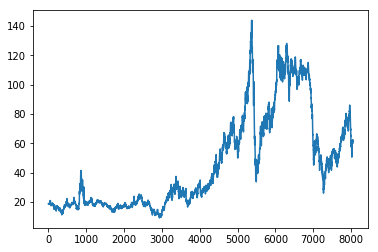

In [93]:
plot(prices['Europe Brent Spot Price FOB (Dollars per Barrel)'])

## Histogram

A histogram is a plot of ordered list of frequencies. You can assume *bins* as the number of divisions seen on X axis.
 
with a simple *hist* command we can get the distribution of oil prices

(array([3052., 1314.,  644.,  818.,  696.,  353.,  268.,  726.,  149.,
          28.]),
 array([  9.1  ,  22.585,  36.07 ,  49.555,  63.04 ,  76.525,  90.01 ,
        103.495, 116.98 , 130.465, 143.95 ]),
 <a list of 10 Patch objects>)

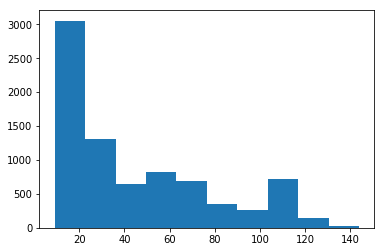

In [94]:
hist(prices['Europe Brent Spot Price FOB (Dollars per Barrel)'])

Now let's increase the resolution with *bins* command

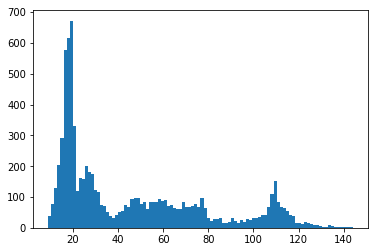

In [95]:
hist(prices['Europe Brent Spot Price FOB (Dollars per Barrel)'], bins=100);

See the difference? In the second plot we just used  **_bins=100_** command to increase resolution in X axis

But the numbers are oil prices. The histogram of change can be much more meaningful. To have the percentage change of a data set is done by subfunction **_.pct\__change()_**

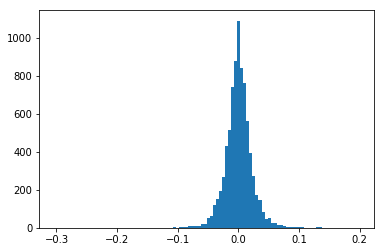

In [96]:
hist(prices['Europe Brent Spot Price FOB (Dollars per Barrel)'].pct_change(), bins=100 );

This brings us to our first conclusion: ** oil prices do not change a lot daily. ** . But what is the extent of these changes.. Now we will investigate this change

## A Closer Look

Most of the percent change in oil price data is aligned between -0.1 (-10%) and 0.1 (10%). The automatic range on X axis shows us that there are extreme negatives (-30%ish) and extreme positives (%20%~). We may want to look these regions closely. 

As a first step, we will assign the percentage changes to a new variable called pc. Then we will produce the histogram of pc(percent change) data. It should look similar to the one above.

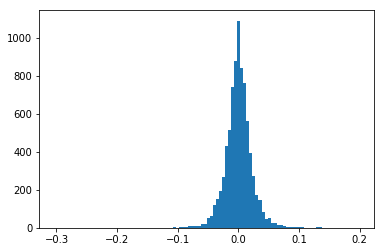

In [97]:
pc=prices['Europe Brent Spot Price FOB (Dollars per Barrel)'].pct_change()
hist(pc, bins=100);

## Filtering Data

The graph above is to cumbersome to see most of the action. I need to filter the data. Specifically I want to look at 1%(=0.01) and -1%(-0.01) range.  

Initially, by conditional and logical operators I can choose certain numbers inline with my rules such as larger than 0.01.

If pc>0.01 is executed, it will produce bunch of **True** and **False**s. When these **True** and **Falses** are inputted into original data to produce DATA from True values. If a value is True for that cell, it's value will be selected.

Let's do it one by one
Step 1. Values larger than 0.01 (means >0.01) - You can use without paranthesis. To save space, i am looking for the first 5 data

In [98]:
(pc>0.01 ).head(5)

0    False
1    False
2    False
3    False
4    False
Name: Europe Brent Spot Price FOB (Dollars per Barrel), dtype: bool

Now, we will insert the True-False values to produce data points bigger than %1 (=0.01)

In [99]:
pc[pc>0.01].head(5)

26    0.020321
30    0.014226
35    0.010267
39    0.020121
41    0.011275
Name: Europe Brent Spot Price FOB (Dollars per Barrel), dtype: float64

Now i can combine two conditions with logical and(&) operator. 

Such as  percent changes smaller than 1% and percent changes larger than -1% (in negative terms it is just the opposite) translates to

**_(pc<0.01) & (pc>-0.01)_**


In [100]:
pc[(pc<0.01) & (pc>-0.01)].head(3)

1   -0.009662
2    0.005420
3    0.002695
Name: Europe Brent Spot Price FOB (Dollars per Barrel), dtype: float64

Now we can plot the histogram of data between 1% and -1% again

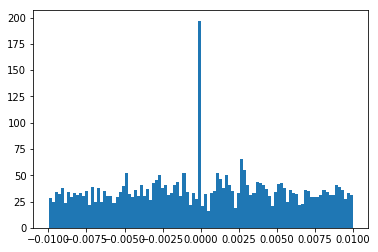

In [101]:
hist(pc[(pc<0.01) & (pc>-0.01)], bins=100);

This looks quite strange let's look at 5% ranges.

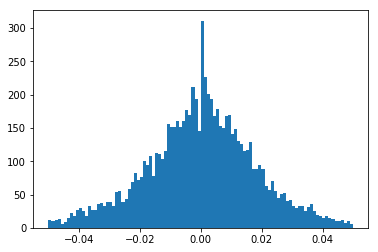

In [102]:
hist(pc[(pc<0.05) & (pc>-0.05)], bins=100);

An easier way is to just put range in hist command 

**range= (-0.05, 0.05)** parameter tells the hist command that we would like to see only 5%<->-5% range, without filtering data

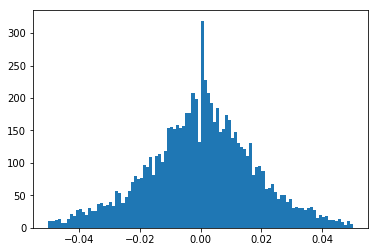

In [103]:
hist(pc, bins=100, range=(-0.05,0.05));

## Calculating extreme and normal condition probabilities

So we can filter data, and find number of variables that the filtration results. Now we can try to find the probability of 1% <-> -1% oil price movements in the whole series.

First we will use cumbersome method, then **.count** command will be used.



In [104]:
# What was the shape of original data?
pc.shape

(8048,)

Since **shape** returns tuple. So we can extract value using [0] or [1]

In [105]:
pc.shape[0]

8048

We know that there are 8043 rows ( In Python (rows,columns) is the general usage). We can also call a command called count

In [106]:
pc.count()

8047

***Warning***
With shape we got 8043, but with count we found 8042. The difference is because count() excludes NA values.

For probabilities I will use both ways to illustrate both ways. 

Probability of 1%<->-1% = (number of cells in between 1% and -1%) / (total data population)

Let's start with 1% 

In [107]:
# For 1% 
pc[(0.01>pc) & (-0.01<pc)].shape[0]/pc.shape[0]

0.44719184890656066

How many cells are in between 5% and -5%?

In [108]:
pc[(0.05>pc) & (-0.05<pc)].shape[0]

7770

So probability for 5% should be 7765/8043

In [109]:
7765/8043

0.9654357826681587

Now we can calculate and print the ranges in order

In [110]:
print("The probability of oil price changes between 1% and -1%% is ", (100*pc[(0.01>pc) & (-0.01<pc)].shape[0]/pc.shape[0]))
print("The probability of oil price changes between 5% and -5%% is " ,(100*pc[(0.05>pc) & (-0.05<pc)].shape[0]/pc.shape[0]))
print("The probability of oil price changes larger than 5% is " , (100*(pc[(0.05<pc)].shape[0])/pc.shape[0]))
print("The probability of oil price changes lower(extreme) than -5% is " ,  (100*pc[(-0.05>pc)].shape[0]/pc.shape[0]))

The probability of oil price changes between 1% and -1%% is  44.71918489065607
The probability of oil price changes between 5% and -5%% is  96.54572564612326
The probability of oil price changes larger than 5% is  1.9880715705765408
The probability of oil price changes lower(extreme) than -5% is  1.4537773359840955


Unfortunately the output is not that pretty. Print command can also do formating. Print formatting can be tricky. Especially, if you are using % (percent) sign in the text part.

1. You have to replace **all '%' signs with '%%'** to help python not confuse this sign with formatting sign. 
2. Instead of comma (,) use *%* at the end of quotes "
3. Insert **'%.2f'** (meaning 2 digits decimals) to relevant position in the string to be printed

In [111]:
print("The probability of oil price changes between 1%% and -1%% is %.2f%%" % (100*pc[(0.01>pc) & (-0.01<pc)].shape[0]/pc.shape[0]))
print("The probability of oil price changes between 5%% and -5%% is %.2f%%" % (100*pc[(0.05>pc) & (-0.05<pc)].shape[0]/pc.shape[0]))
print("The probability of oil price changes larger than 5%% is %.2f%%" % (100*(pc[(0.05<pc)].shape[0])/pc.shape[0]))
print("The probability of oil price changes lower(extreme) than -5%% is %.2f%%" % (100*pc[(-0.05>pc)].shape[0]/pc.shape[0]))

The probability of oil price changes between 1% and -1% is 44.72%
The probability of oil price changes between 5% and -5% is 96.55%
The probability of oil price changes larger than 5% is 1.99%
The probability of oil price changes lower(extreme) than -5% is 1.45%


## Investigating Extremes - Minimum and Maximum values and their position

This time, the extreme values will be looked after. As a start, we can plot biggest drops and biggest increases in oil prices.

The largest price falls on a single day are as follows (checking the range -31% <-> -5% ) 

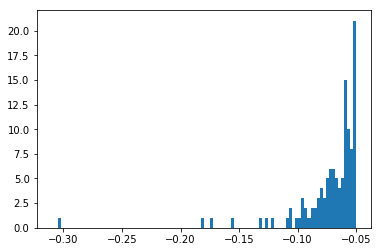

In [112]:
hist(pc, bins=100, range=(-0.31,-0.05));

Are we sure that this is the minimum? We can check by **min** command

In [113]:
pc.min()

-0.30317040951122853

Largest single day price drop is **-30%** on a SINGLE DAY. Wow. What was the day? The command is **idxmax()**

In [114]:
pc.idxmin()

936

That was dull. Just a mere position of minimum value. We have to insert this number into array to get the value. Or we can do better: Dates around that position

To find the dates around that position, we have to turn back to our initial data **prices** . Since **pc** does not have corresponding date value. 

For accesing a data on a specific row or column we use **iloc** notation. Such as **data.iloc[row, column]**


There are two ways we can do it:
1. Put an array for days such as **[935,936,937]**
2. Or use the range command to get the results in the 1st item. **range(935,938)**

In [115]:
prices.iloc[[935,936,937]]

,Date,Europe Brent Spot Price FOB (Dollars per Barrel)
935,1991-01-16,30.28
936,1991-01-17,21.10
937,1991-01-18,19.10


In [116]:
prices.iloc[range(935,938)]

,Date,Europe Brent Spot Price FOB (Dollars per Barrel)
935,1991-01-16,30.28
936,1991-01-17,21.10
937,1991-01-18,19.10


Why not **pc**? Let's try the same with pc

In [117]:
pc.iloc[[935,936,937]]

935    0.035214
936   -0.303170
937   -0.094787
Name: Europe Brent Spot Price FOB (Dollars per Barrel), dtype: float64

As you see there are no date values! We have to check original data. There is another way to solve this problem. A new column can be created and filled with percent change values in the original dataset. We will do it in the next part.

With **.idxmax()** , maximum value's row can be found

In [118]:
# max value
pc.idxmax()

5499

In [119]:
prices.iloc[range(5498,5501)]

,Date,Europe Brent Spot Price FOB (Dollars per Barrel)
5498,2008-12-31,35.82
5499,2009-01-02,42.94
5500,2009-01-05,45.84


As a result:
1. Biggest fall in oil prices happened on 17 Jan 1991. Oil prices dropped from 30 to 21\$
2. Biggest increase in oil prices is observed on 2 Jan 2009. Prices jumped from 35 to 42\$

## Increasing Complexity : Creating a bigger data set with Week, Month, Percent Change 

Our original dataset **prices** includes all oil prices, but we may want to add
* Day
* Week
* Month
* Year
* Percent Change

data to original set.

As a first step, we can add Week data as a new column to original dataset. It is straight forward. Add data to original set with a new title. In this case "Week_Number"

In [120]:
# Add a new column Week_number and convert the Date data in the prices dataset to week number
prices["Week_Number"]=prices["Date"].dt.week

Now let's see the dataset's ending

In [121]:
prices.tail(3)

,Date,Europe Brent Spot Price FOB (Dollars per Barrel),Week_Number
8045,2019-01-31,62.46,5
8046,2019-02-01,61.86,5
8047,2019-02-04,62.26,6


If there are no problems so far, we can continue with other relevant data

In [122]:
prices["Month"]=prices["Date"].dt.month
prices["Year"]=prices["Date"].dt.year
prices["DoW"]=prices["Date"].dt.dayofweek

The dataset transformed into its new form. For **Day of the Week**, 0 corresponds to Monday, 1 Tuesday, etc. For oil prices, there are no weekends. The numbers must be between 0 and 4

In [123]:
#let's see last 4 lines
prices.tail(4)

,Date,Europe Brent Spot Price FOB (Dollars per Barrel),Week_Number,Month,Year,DoW
8044,2019-01-30,61.89,5,1,2019,2
8045,2019-01-31,62.46,5,1,2019,3
8046,2019-02-01,61.86,5,2,2019,4
8047,2019-02-04,62.26,6,2,2019,0


Now we can continue with our analysis

## Pivot Tables in Python Pandas 

### Grouping

One of the easist starting point for creating aggregated data is grouping. We can group the data according to weeks. In **pandas** you can use **groupby** to group data according to a column. With **.mean()** or **.count()** , the aggregate outputs can be obtained

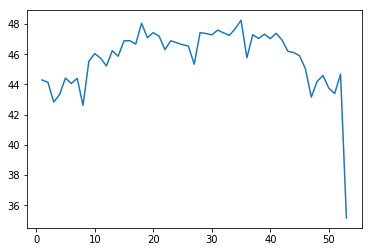

In [124]:
plot(prices.groupby("Week_Number")['Europe Brent Spot Price FOB (Dollars per Barrel)'].mean())


Unfortunately depending on years, there may be the 53th weeks. I prefer to drop these by taking the first 52 weeks

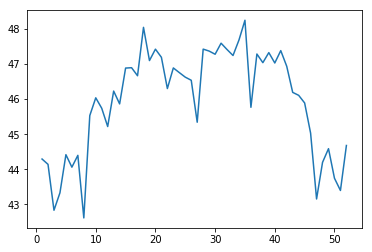

In [125]:
plot(prices.groupby("Week_Number")['Europe Brent Spot Price FOB (Dollars per Barrel)'].mean().head(52))


This graph needs a title, x and y axis labels. We will use **plt.title** or **plt.xlabel** since **%pylab inline** creates a plot variable named plt

Text(0, 0.5, '$/barrel')

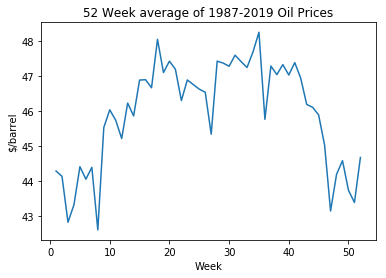

In [126]:
plot(prices.groupby("Week_Number")['Europe Brent Spot Price FOB (Dollars per Barrel)'].mean().head(52))
plt.title("52 Week average of 1987-2019 Oil Prices")
plt.xlabel("Week")
plt.ylabel("$/barrel")

Now let's take it to another level. For example let's see the weekly price movements for 2018.
It requires two steps. 

1) filter the data for 2018 with **prices[prices.Year==2018]**

2) The whole dataset will take 365 lines, so just see the first few lines with **.head(4)**


In [127]:
pf=prices[prices.Year==2018]
pf.head(4)

,Date,Europe Brent Spot Price FOB (Dollars per Barrel),Week_Number,Month,Year,DoW
7772,2018-01-02,66.65,1,1,2018,1
7773,2018-01-03,67.85,1,1,2018,2
7774,2018-01-04,68.73,1,1,2018,3
7775,2018-01-05,68.01,1,1,2018,4


Now, we will group the filtered results

In [128]:
# Just look at the averages for the first 4 week
pf.groupby("Week_Number")['Europe Brent Spot Price FOB (Dollars per Barrel)'].mean().head(4)

Week_Number
1    67.810
2    69.470
3    69.388
4    70.040
Name: Europe Brent Spot Price FOB (Dollars per Barrel), dtype: float64

Now we can choose the data for 2018 and view weekly means

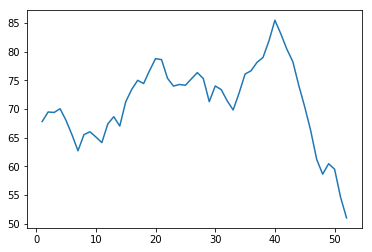

In [129]:
plot(pf.groupby("Week_Number")['Europe Brent Spot Price FOB (Dollars per Barrel)'].mean())


Or we can write in a very long but no-variable kind of way

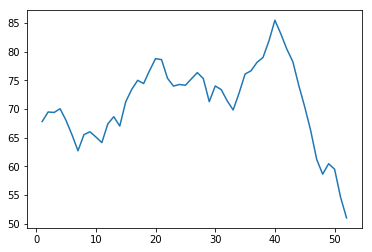

In [130]:
plot(prices[prices.Year==2018].groupby("Week_Number")['Europe Brent Spot Price FOB (Dollars per Barrel)'].mean())

Now we can check last 5 and 10 years with range command:

* 5 years with  *range(2014,2019)*
* 10 years with *range(2009,2019)*

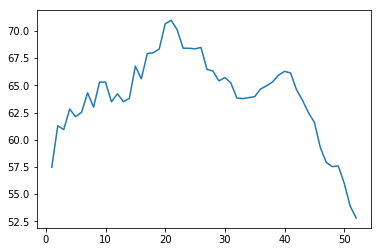

In [131]:
plot(prices[prices.Year>=2014].groupby("Week_Number")['Europe Brent Spot Price FOB (Dollars per Barrel)'].mean().head(52))

Or we can do it in a more readable way. 

1) Assign partial dataset (for years larger and equal to 2014) to **pf** (price frame)

2) Then use the groupby command on **pf**


In [132]:
pf=prices[prices.Year>=2014]

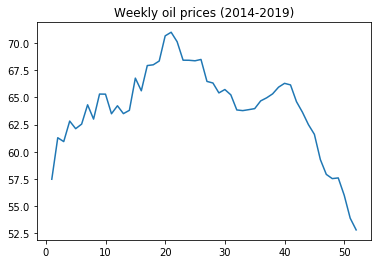

In [133]:
plot(pf.groupby("Week_Number")['Europe Brent Spot Price FOB (Dollars per Barrel)'].mean().head(52))
# title for the plot and ";" for supressing text output
title("Weekly oil prices (2014-2019)");

### Pivot Table

**Warning** _I have to warn the reader that, grouping and pivoting produced slightly different results for averages. At the time of writing, I couldn't figured out why. I tried NA (not available) data options, other options but no results unfortunately._

Pivot tables are an essential part of data analysis. Basically, pivot tables re-arrange dataset into user's liking. Additional mathematical operations like "averaging", "summing" can be used. 

Now from the original prices dataset, we will rearrage values by

* Change the index of dataset to week number           ---->    **index=['Week_Number']**
* Produce Columns for each year with averages          ---->    **columns=['Year']**
* We will use average function from numpy              ---->    **aggfunc=np.mean**
* The data cells will be values from Brent price       ---->    **values='Europe Brent Spot Price FOB (Dollars per Barrel)'**


It may look stupid for careful observer to use the long name of _"Europe Brent Spot Price FOB (Dollars per Barrel)"_ for Brent price, but in jupyter you just press **tab** and it pops up



In [134]:
pt=prices.pivot_table( values='Europe Brent Spot Price FOB (Dollars per Barrel)', index=['Week_Number'],
                     columns=['Year'], aggfunc=np.mean)

Now let's check pt (pt for pivot table)

In [135]:
pt.head(4)

Year,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Week_Number,,,,,,,,,,,,,,,,,,,,,
1,NaN,17.4525,16.590,23.566,22.332,18.475,17.510,14.1775,16.0725,20.763333,...,79.8180,94.722,112.168,111.8020,76.648,55.3800,34.194,55.1275,67.810,54.310
2,NaN,16.4360,16.980,21.674,25.328,17.772,17.052,14.0000,16.2320,18.528000,...,78.3100,97.086,111.776,112.3720,107.014,49.4660,29.100,54.0160,69.470,58.636
3,NaN,16.9080,17.896,21.052,25.856,18.370,16.978,14.2160,16.8840,17.614000,...,74.2825,97.340,109.600,111.3460,107.828,46.5780,27.756,54.1940,69.388,59.830
4,NaN,16.2400,17.328,20.494,20.766,18.112,18.004,14.6420,16.8480,17.188000,...,71.8820,96.620,109.180,113.7175,109.140,46.4425,31.748,54.9060,70.040,61.342


## More Filtering

The first thing that strikes on the table is 1987. There are lots of NaN until May of that year. Dataset starts from May 1987. Apart from that, there are now weekly averages for all years in columns.

Now we can choose years from 2014 to 2019 and plot their  first 52 weeks
* range(2014, 2020) produces 2014,2015,2016,2017,2018,2019.... The last element is never included in range
* By taking the mean of weekly data, **mean** command with **(axis=1)** is used to tell Python to take averages row-wise
* 53th week in a year rarely happens, therefore I omit it with **head(52)**

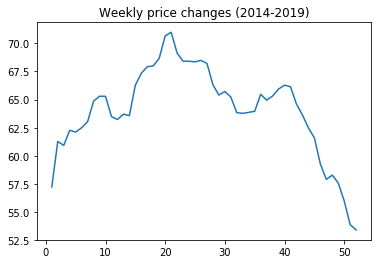

In [136]:
plot(pt.loc[:,range(2014,2020)].mean(axis=1).head(52))
title ("Weekly price changes (2014-2019)");

You can check what is included with *range and print command in a line

In [137]:
# range command does not include the last element 
print(*range(2014,2020))

2014 2015 2016 2017 2018 2019


If everyting is clear, we can produce percent changes of weekly oil prices. Just call **pct_change()** subcommand for dataframe and it will work

In [138]:
ptpc=pt.pct_change()

Always check the data, or at least part of it (first 4 lines with **head(4)** )

In [139]:
ptpc.head(4)

Year,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Week_Number,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,-0.058244,0.023508,-0.080285,0.134157,-0.038051,-0.026156,-0.012520,0.009924,-0.107658,...,-0.018893,0.024957,-0.003495,0.005098,0.396175,-0.106789,-0.148974,-0.020162,0.024480,0.079654
3,NaN,0.028717,0.053946,-0.028698,0.020846,0.033648,-0.004340,0.015429,0.040168,-0.049331,...,-0.051430,0.002616,-0.019468,-0.009130,0.007606,-0.058384,-0.046186,0.003295,-0.001180,0.020363
4,NaN,-0.039508,-0.031739,-0.026506,-0.196860,-0.014045,0.060431,0.029966,-0.002132,-0.024185,...,-0.032316,-0.007397,-0.003832,0.021298,0.012168,-0.002909,0.143825,0.013138,0.009396,0.025272


First line is NaN for each year since we didn't put December 12th month of the previous year to the head of January

But now let's graph the percent changes for the whole dataset again

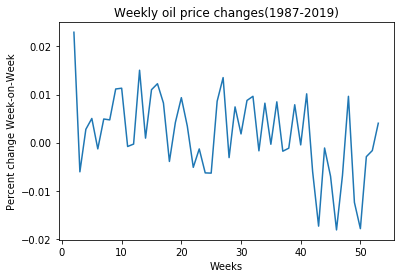

In [140]:
plot(ptpc.mean(axis=1))
title("Weekly oil price changes(1987-2019)")
xlabel("Weeks")
ylabel("Percent change Week-on-Week");

#### 5 year and 10 year average weekly prices
 
Instead of % changes, let's turn back to original dataset of **pt**. For the last 5 years and 10 years, we will graph level changes, afterwards percent changes will be examined

* produce year data by range(2014, 2019)  ---> 2014,2015,2016,2017,2018
* Filter the **pt** for this years        ---> pt.loc[:range(2014,2019)]
* Take the mean of same weeks             ---> mean(axis=1)
* Skip the 53rd week                      ---> head(52)

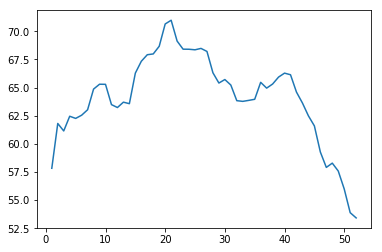

In [141]:
# First 5 years 2014,2015,2016,2017,2018
plot(pt.loc[:,range(2014,2019)].mean(axis=1).head(52))

Now let's see the 10 year data

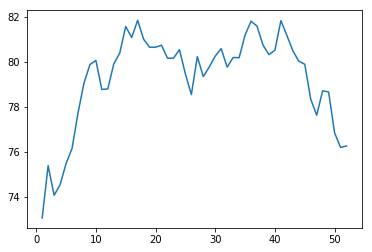

In [142]:
# 10 years of average weekly prices
plot(pt.loc[:,range(2009,2019)].mean(axis=1).head(52));

For the 10 year average data there is a huge jump before 10th week. But I rather choose the last 5 years. The US shale production has shown its real effect in the last 5 years. You can do the 10 by yourself

To look more closely, we will take percent change and graph it again

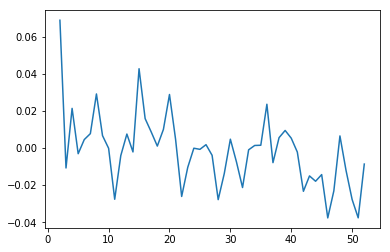

In [143]:
pt_weekly=pt.loc[:,range(2014,2019)].mean(axis=1).head(52)
plot(pt_weekly.pct_change());

Let's assign percent changes to a new variable. We will do more filtering

In [144]:
pt_weekly_pc=pt_weekly.pct_change()

This time we will filter the weeks, where change is bigger than 2% in absolute terms.
* Get the absolute value of percent change      ---->   abs(pt_weekly_pc)>0.02
* Now filter the data points                    ---->   pt_weekly_pc[abs(pt_weekly_pc)>0.02]

In [145]:
pt_weekly_pc[abs(pt_weekly_pc)>0.029]

Week_Number
2     0.068843
8     0.029134
15    0.042727
46   -0.037651
51   -0.037612
dtype: float64

## Converting week numbers to dates

Now we can convert these week numbers to date with time command. Converting week numbers to dates is tricky. 

We again choose the dates for higher than 2.9% (arbitrary), and then insert the corresponding week numbers (.index.values) to **strptime**


In [146]:
for weeks in pt_weekly_pc[abs(pt_weekly_pc)>0.029].index.values:
    print(time.asctime(time.strptime('{} {} 1'.format(2019, weeks), '%Y %W %w')))

Mon Jan 14 00:00:00 2019
Mon Feb 25 00:00:00 2019
Mon Apr 15 00:00:00 2019
Mon Nov 18 00:00:00 2019
Mon Dec 23 00:00:00 2019


For the last 5 years, we are seeing strongest 
* Price increases in Second week of January, Last week of February, Mid April (positive values)
* Price decreases in November and December

## Monthly data

Weekly data part is as follows. In my original paper, I did the analysis for the last 10 years. In this tutorial it is for the last 5 years.

For the montly data analysis, we have another step to conclude. For January percent changes will appear as NA. Therefore, we have to copy paste each last years December data before January, but we have to shift is as well. 1987 December will be before 1988 January etc.

our steps are as follows:
 * Rearrange data with pivot table
 * copy and paste last row (December) before January row with a shift (shift row by 1 column)
 * Calculate percent changes
 

In [147]:
# Prices monthly data to pm variable
pm=prices.pivot_table( values='Europe Brent Spot Price FOB (Dollars per Barrel)', index=['Month'],
                     columns=['Year'], aggfunc=np.mean)

First 4 lines of the new varible:

In [148]:
pm.head(4)

Year,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Month,,,,,,,,,,,,,,,,,,,,,
1,NaN,16.749444,17.171905,21.251818,23.566364,18.163636,17.386000,14.291500,16.551905,17.853182,...,76.167368,96.523500,110.686000,112.960000,108.117727,47.759500,30.699500,54.576667,69.077273,59.409545
2,NaN,15.729524,16.888500,19.813500,19.536000,18.053500,18.466316,13.802000,17.114500,17.999048,...,73.752105,103.716316,119.327000,116.050526,108.900526,58.095500,32.181500,54.869500,65.317500,62.060000
3,NaN,14.731304,18.700952,18.387273,19.082500,17.630909,18.785217,13.822609,17.006522,19.851905,...,78.827391,114.643478,125.445455,108.474000,107.480952,55.885455,38.210455,51.589130,66.016667,NaN
4,NaN,16.595263,20.319500,16.612105,19.180000,18.919048,18.674500,15.231579,18.648333,20.900500,...,84.817619,123.258889,119.421667,102.248182,107.755238,59.524286,41.583333,52.307895,72.106000,NaN


Now comes the tricky part
* **pm.loc[12,:]** gives us all the data on 12th row (December)
* **.shift(1)** shifts the data to the right. So 1987 December can be on the same column with 1988
* pasting the shifted row data to zero index will be the final touch

In [149]:
pm.loc[0]=pm.loc[12,:].shift(1)
pm.head(3)

Year,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Month,,,,,,,,,,,,,,,,,,,,,
1,NaN,16.749444,17.171905,21.251818,23.566364,18.163636,17.386000,14.291500,16.551905,17.853182,...,76.167368,96.523500,110.686000,112.960000,108.117727,47.759500,30.699500,54.576667,69.077273,59.409545
2,NaN,15.729524,16.888500,19.813500,19.536000,18.053500,18.466316,13.802000,17.114500,17.999048,...,73.752105,103.716316,119.327000,116.050526,108.900526,58.095500,32.181500,54.869500,65.317500,62.060000
3,NaN,14.731304,18.700952,18.387273,19.082500,17.630909,18.785217,13.822609,17.006522,19.851905,...,78.827391,114.643478,125.445455,108.474000,107.480952,55.885455,38.210455,51.589130,66.016667,NaN


We can not see the 0th row. That is because pasted row is added to the last line. Our index is month, therefore **sort_index()** will solve our problem.

In [150]:
pm=pm.sort_index()
pm.head(3)


Year,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Month,,,,,,,,,,,,,,,,,,,,,
0,NaN,17.054091,15.306667,19.838947,28.273500,18.410952,18.139524,13.725714,15.932000,17.925263,...,74.456364,91.446818,107.8705,109.494000,110.756667,62.3350,38.005455,53.308500,64.373684,57.362353
1,NaN,16.749444,17.171905,21.251818,23.566364,18.163636,17.386000,14.291500,16.551905,17.853182,...,76.167368,96.523500,110.6860,112.960000,108.117727,47.7595,30.699500,54.576667,69.077273,59.409545
2,NaN,15.729524,16.888500,19.813500,19.536000,18.053500,18.466316,13.802000,17.114500,17.999048,...,73.752105,103.716316,119.3270,116.050526,108.900526,58.0955,32.181500,54.869500,65.317500,62.060000


Now we can calculate percent change

In [151]:
pmc=pm.pct_change()
pmc.head(3)

Year,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Month,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,-0.017864,0.121858,0.071217,-0.166486,-0.013433,-0.041540,0.041221,0.038909,-0.004021,...,0.02298,0.055515,0.026101,0.031655,-0.023826,-0.233825,-0.192234,0.023789,0.073067,0.035689
2,NaN,-0.060893,-0.016504,-0.067680,-0.171022,-0.006064,0.062137,-0.034251,0.033990,0.008170,...,-0.03171,0.074519,0.078068,0.027359,0.007240,0.216418,0.048274,0.005366,-0.054429,0.044613


Now we can delete row 0, since it is full of NaN

To delete row 0, drop command is used. But do not forget to assign the new data table to original variable

In [152]:
pmc=pmc.drop(pmc.index[0])

In [153]:
pmc.head()

Year,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Month,,,,,,,,,,,,,,,,,,,,,
1,NaN,-0.017864,0.121858,0.071217,-0.166486,-0.013433,-0.041540,0.041221,0.038909,-0.004021,...,0.022980,0.055515,0.026101,0.031655,-0.023826,-0.233825,-0.192234,0.023789,0.073067,0.035689
2,NaN,-0.060893,-0.016504,-0.067680,-0.171022,-0.006064,0.062137,-0.034251,0.033990,0.008170,...,-0.031710,0.074519,0.078068,0.027359,0.007240,0.216418,0.048274,0.005366,-0.054429,0.044613
3,NaN,-0.063462,0.107319,-0.071983,-0.023214,-0.023408,0.017269,0.001493,-0.006309,0.102942,...,0.068815,0.105356,0.051275,-0.065286,-0.013036,-0.038042,0.187342,-0.059785,0.010704,0.000000
4,NaN,0.126530,0.086549,-0.096543,0.005109,0.073061,-0.005894,0.101932,0.096540,0.052821,...,0.075992,0.075150,-0.048019,-0.057395,0.002552,0.065112,0.088271,0.013932,0.092239,0.000000
5,NaN,-0.016943,-0.082990,-0.015641,0.000355,0.051242,-0.008922,0.062792,-0.015949,-0.083526,...,-0.104602,-0.067093,-0.076051,0.003036,0.016555,0.076451,0.124065,-0.037879,0.067529,0.000000


Now we can calculate the last 10 years of percent changes or each month.
* Filter pmc
* Take mean for each row


In [154]:
pmc.loc[:,range(2009,2020)].mean(axis=1)

Month
1    -0.008514
2     0.037552
3     0.029233
4     0.035098
5     0.013082
6    -0.005655
7    -0.004082
8     0.005426
9     0.012227
10    0.009811
11   -0.029433
12   -0.018523
dtype: float64

For the last 10 years, February-April is most probably positive months. November and December are probably negative months.
Now let's check for the 1987-2019

In [155]:
pmc.mean(axis=1)

Month
1     0.007312
2     0.006919
3     0.027188
4     0.032079
5     0.021397
6    -0.007607
7     0.017863
8     0.024199
9     0.015686
10   -0.000595
11   -0.033889
12   -0.025382
dtype: float64

Combining two results:
* Rise starts with Feb-March
* April is most probable for price hikes
* Price changes turn negative for November and December

In more detail, we can calculate the probabilites for each month. The process is straight forward
* if the cell data is bigger than 0            ----> **pmc[(pmc.iloc[:,:]>0)]**
* then count the number of cells in each row   ----> **.count(axis=1)**
* divide the number of positive cells to total ----> **/(2020-1987+1)**
* assign the values to "Positive" labeled column --> **pmc["Positive"]**

In [156]:
pmc["Positive"]=pmc[(pmc.iloc[:,:]>0)].count(axis=1)/(2020-1987+1)

Do the same for negative price movements

In [157]:
pmc["Negative"]=pmc[(pmc.iloc[:,:]<0)].count(axis=1)/(2020-1987+1)

Let's see the total results for Positive and Negative columns

In [158]:
pmc[["Positive","Negative"]]

Year,Positive,Negative
Month,,
1,0.588235,0.352941
2,0.529412,0.411765
3,0.500000,0.411765
4,0.647059,0.264706
5,0.470588,0.441176
6,0.382353,0.558824
7,0.558824,0.382353
8,0.529412,0.411765
9,0.558824,0.382353


The results above means that for April (month=4), a price increase(=positive) is 70%(=0.705) where as probability for price decrease is 26%(=0.26)

## More Monthly Graphics

Now we can plot average montly prices for 2009-2019 and 1987-2019. 

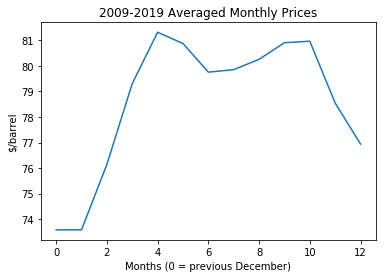

In [159]:
plot(pm.loc[:,range(2009,2020)].mean(axis=1))
plt.title('2009-2019 Averaged Monthly Prices')
plt.xlabel("Months (0 = previous December)")
plt.ylabel("$/barrel");

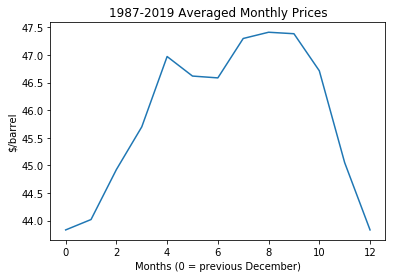

In [160]:
plot(pm.loc[:,range(1987,2020)].mean(axis=1))
plt.title('1987-2019 Averaged Monthly Prices')
plt.xlabel("Months (0 = previous December)")
plt.ylabel("$/barrel");

## Day of the Week effect

In oil prices, there may be Monday or Friday effects. "Never short on Friday" is a known saying among traders. We can test it

First let's rearrange our data with pivot date, this time columns are **day of week**

In [161]:
prices.head(3)

,Date,Europe Brent Spot Price FOB (Dollars per Barrel),Week_Number,Month,Year,DoW
0,1987-05-20,18.63,21,5,1987,2
1,1987-05-21,18.45,21,5,1987,3
2,1987-05-22,18.55,21,5,1987,4


We can add a percentage change column to the data

In [162]:
prices["Percent"]=prices["Europe Brent Spot Price FOB (Dollars per Barrel)"].pct_change()
prices.head(3)

,Date,Europe Brent Spot Price FOB (Dollars per Barrel),Week_Number,Month,Year,DoW,Percent
0,1987-05-20,18.63,21,5,1987,2,NaN
1,1987-05-21,18.45,21,5,1987,3,-0.009662
2,1987-05-22,18.55,21,5,1987,4,0.005420


Now we can use pivot_table to arrange our data. This time index is Years and columns willbe Day of Week (0=Monday, 1=Tue ... , 4=Friday)

In [163]:
pday=prices.pivot_table( values='Percent', index=['Year'],columns=['DoW'], aggfunc=np.mean)

# This time check the last 5 lines
pday.tail (5)

DoW,0,1,2,3,4
Year,,,,,
2015,-0.009459,0.000115,0.001394,0.005044,-0.004126
2016,-0.000331,-0.004429,0.004347,0.006471,0.003784
2017,0.002077,-0.000406,0.001024,0.002055,-0.000297
2018,0.004332,-0.002389,-0.002304,-0.002070,-0.001775
2019,-0.000282,-0.001299,0.030197,0.002433,0.011694


How many rows and columns are there in our new variable **pday** ?

In [164]:
pday.shape

(33, 5)

We have yearly averages and we can count positive and negative values for each day

In [165]:
pday[pday>0].count()

DoW
0    14
1    14
2    18
3    24
4    19
dtype: int64

To make sure, now number of negative percent changes

In [166]:
pday[pday<0].count()

DoW
0    19
1    19
2    15
3     9
4    14
dtype: int64

And the the probability calculations are pretty straightforward. Divide the number by 33 or Number of rows

In [167]:
pday[pday>0].count()/pday.shape[0]

DoW
0    0.424242
1    0.424242
2    0.545455
3    0.727273
4    0.575758
dtype: float64

The Day of The Week 3 has a probability of %72. That means Thursdays are most probably ends up with a positive oil price movement.

In [168]:
pday[pday<0].count()/pday.shape[0]

DoW
0    0.575758
1    0.575758
2    0.454545
3    0.272727
4    0.424242
dtype: float64

On the negative side, Monday and Tuesdays have a higher probability to be negative.

# Conclusion

In this notebook, I tried to demonstrate basic filtering, grouping and plotting functions of Python.

Oil prices are not predictable, but there may be trends hidden. Python makes it easier to work on these data sets

### Baris Sanli, 8 Feb 2019,  barissanli2@gmail.com ,  www.barissanli.com